In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import zipfile

In [3]:

zip_file_path = '/Users/ALONA/Desktop/Go_IT/HW/Data Science/Data_Science/Lessons/Customer_Purchase_Behavior/archive.zip'

# Открытие ZIP-архива и вывод содержимого
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Вывод списка файлов в архиве
    print("Contents of the ZIP archive:") #print("Содержимое ZIP-архива:")
    for file_info in z.infolist():
        print(file_info.filename)

Contents of the ZIP archive:
customer_purchase_data.csv


In [7]:

csv_file_name = "customer_purchase_data.csv"

with zipfile.ZipFile(zip_file_path, "r") as z:   # Открытие архива и чтение CSV-файла
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)


print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB
None


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [9]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

# Training on the output of normalized data

In [30]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


## Baseline models

In [31]:
all_features = ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']

scaler = StandardScaler()

df_copy = df.copy()
df_copy[all_features] = scaler.fit_transform(df_copy[all_features])

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    df_copy[all_features], 
    df_copy["PurchaseStatus"],
    test_size=0.3,
    stratify=df_copy["PurchaseStatus"]
    )

In [32]:
rf_model_b = RandomForestClassifier()
rf_model_b.fit(X_train_b, y_train_b)
y_pred_rf_b = rf_model_b.predict(X_test_b)
print("Random Forest - Classification Report")
print(classification_report(y_test_b, y_pred_rf_b))
rf_b_accuracy = accuracy_score(y_test_b, y_pred_rf_b)
print("Model accuracy Random Forest:", rf_b_accuracy)

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       256
           1       0.93      0.92      0.93       194

    accuracy                           0.94       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.94      0.94      0.94       450

Model accuracy Random Forest: 0.9355555555555556


In [33]:
gb_model_b = GradientBoostingClassifier()
gb_model_b.fit(X_train_b, y_train_b)
y_pred_gb_b = gb_model_b.predict(X_test_b)

print("Gradient Boosting - Classification Report")
print(classification_report(y_test_b, y_pred_gb_b))
gb_b_accuracy = accuracy_score(y_test_b, y_pred_gb_b)
print("Model accuracy Gradient Boosting:", gb_b_accuracy)

Gradient Boosting - Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       256
           1       0.92      0.92      0.92       194

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450

Model accuracy Gradient Boosting: 0.9333333333333333


In [34]:
svm_model_b = SVC()
svm_model_b.fit(X_train_b, y_train_b)
y_pred_svm_b = svm_model_b.predict(X_test_b)
print("SVM - Classification Report")
print(classification_report(y_test_b, y_pred_svm_b))
svm_b_accuracy = accuracy_score(y_test_b, y_pred_svm_b)
print("Model accuracy SVM:", svm_b_accuracy)

SVM - Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       256
           1       0.84      0.82      0.83       194

    accuracy                           0.86       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.86      0.86      0.86       450

Model accuracy SVM: 0.8555555555555555


In [35]:
lr_model_b = LogisticRegression()
lr_model_b.fit(X_train_b, y_train_b)
y_pred_lr_b = lr_model_b.predict(X_test_b)
print("Logistic Regression - Classification Report")
print(classification_report(y_test_b, y_pred_lr_b))
lr_b_accuracy = accuracy_score(y_test_b, y_pred_lr_b)
print("Model accuracy Logistic Regression:", lr_b_accuracy)

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       256
           1       0.84      0.78      0.81       194

    accuracy                           0.84       450
   macro avg       0.84      0.83      0.84       450
weighted avg       0.84      0.84      0.84       450

Model accuracy Logistic Regression: 0.84


# Correlation

### Calculating Correlation

In [14]:
# Вычисление корреляции
correlation_matrix = df.corr()

# Извлечение корреляции с PurchaseStatus
purchase_status_corr = correlation_matrix['PurchaseStatus'].sort_values(ascending=False)
purchase_status_corr = purchase_status_corr.drop('PurchaseStatus')  # Удаляем корреляцию с самим собой


# Вывод результатов
print("Correlation of features with PurchaseStatus:")
print(purchase_status_corr)

Correlation of features with PurchaseStatus:
LoyaltyProgram        0.310838
DiscountsAvailed      0.303297
TimeSpentOnWebsite    0.277112
NumberOfPurchases     0.222691
AnnualIncome          0.188214
ProductCategory       0.007346
Gender                0.002627
Age                  -0.255747
Name: PurchaseStatus, dtype: float64


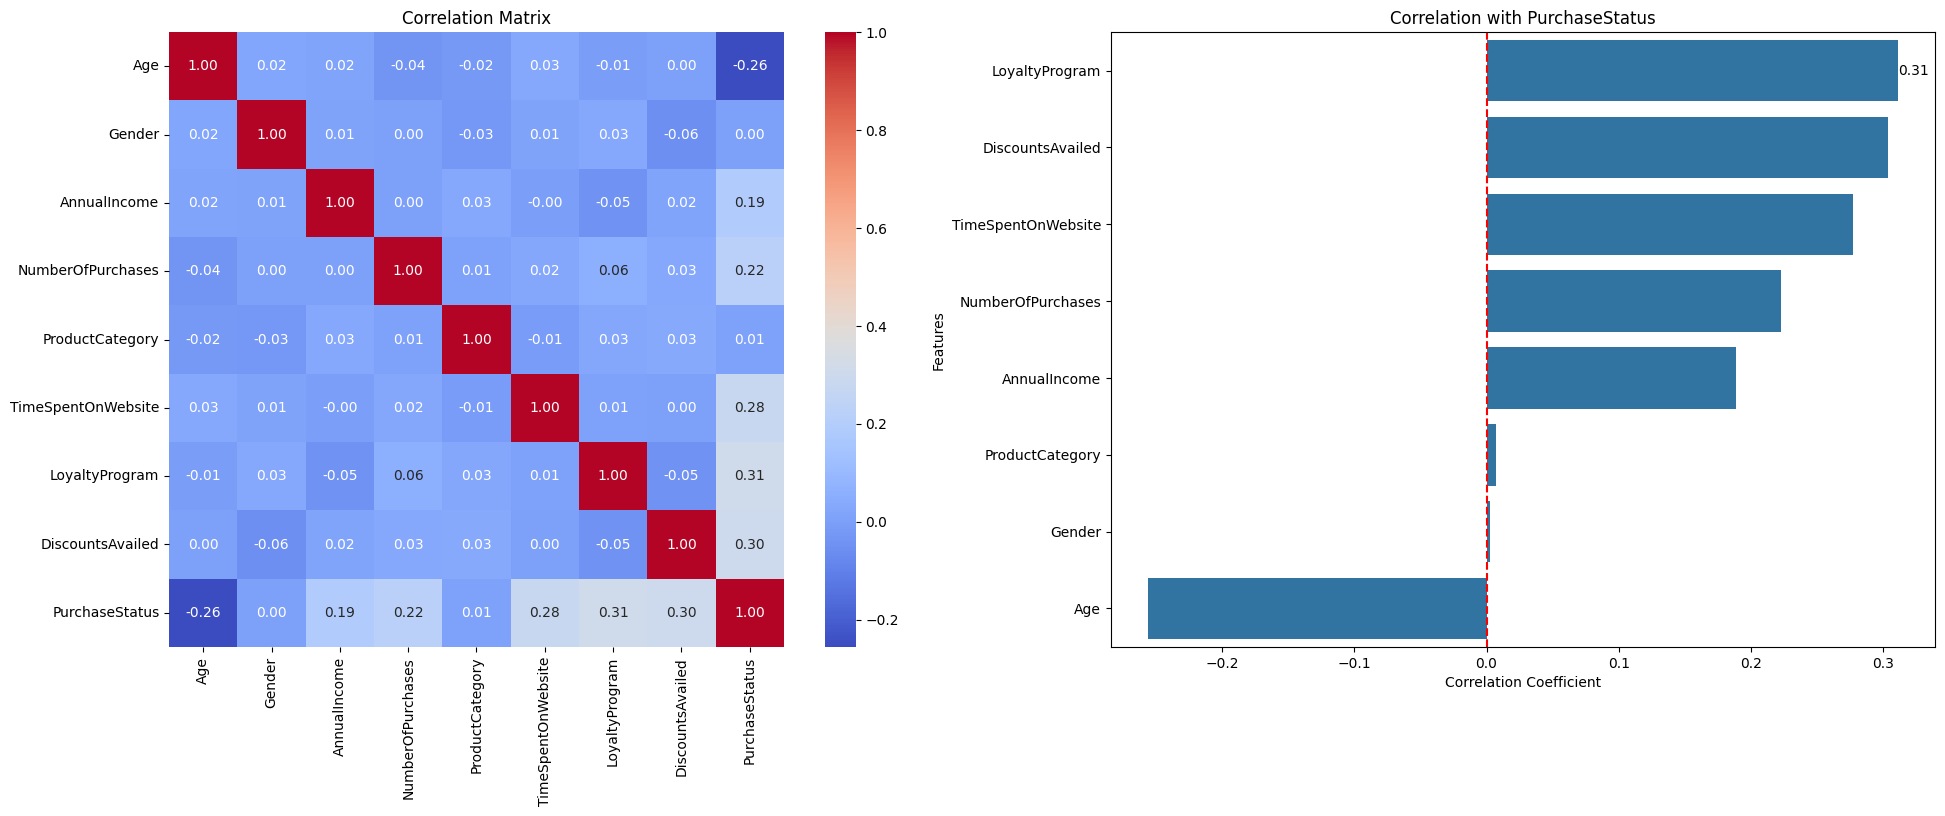

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:

# Создание фигуры с двумя подграфиками рядом
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, ax=ax1)
ax1.set_title("Correlation Matrix")

sns.barplot(x=purchase_status_corr.values, y=purchase_status_corr.index, orient="h", ax=ax2)
ax2.set_title("Correlation with PurchaseStatus")
ax2.set_xlabel("Correlation Coefficient")
ax2.set_ylabel("Features")

# Добавление вертикальной линии на 0 для лучшей визуализации
ax2.axvline(x=0, color="r", linestyle="--")

# Добавление значений корреляции на график
for i, v in enumerate(purchase_status_corr.values):
    ax2.text(v, i, f"{v:.2f}", va="center")

    plt.tight_layout()
    plt.show()

### Analysis of feature correlations with the target variable PurchaseStatus:

- **LoyaltyProgram (0.310838):**
    - Strongest positive correlation.
    - Indicates that participation in the loyalty program has the greatest positive impact on the likelihood of purchase.

- **DiscountsAvailed (0.303297):**
    - Second strongest positive correlation.
    - Shows that using discounts also significantly increases the likelihood of purchase.

- **TimeSpentOnWebsite (0.277112):**
    - Moderate positive correlation.
    - The more time a customer spends on the website, the higher the probability of purchase.

- **NumberOfPurchases (0.222691):**
    - Medium strength positive correlation.
    - Indicates that customers who have made more purchases in the past are more likely to make a purchase again.

- **AnnualIncome (0.188214):**
    - Weak positive correlation.
    - Shows that annual income has some positive influence on the likelihood of purchase, but not very strong.

- **ProductCategory (0.007346) and Gender (0.002627):**
    - Very weak correlation, close to zero.
    - These features have almost no impact on the likelihood of purchase.

- **Age (-0.255747):**
    - Moderate negative correlation.
    - Indicates that younger customers are more likely to make purchases than older ones.

**Conclusions and recommendations:**

- Loyalty program and discounts are the most effective factors in increasing the likelihood of purchase. It is recommended to strengthen these aspects of the marketing strategy.
- Time spent on the website is also important. It's worth working on improving the user experience and increasing the time users spend on the site.
- The number of previous purchases affects future purchases. Strategies should be developed to encourage repeat purchases.
- Age has an inverse correlation. Consider targeting marketing campaigns to a younger audience or develop special offers to attract the older age group.
- Gender and product category have little effect on the likelihood of purchase. This may mean that your products are equally attractive to different genders and categories.
- Annual income has a weak influence. It might be worth considering other factors when segmenting customers.



### Анализ результатов корреляции признаков с целевой переменной PurchaseStatus:
- **LoyaltyProgram (0.310838):**    
    - Самая сильная положительная корреляция.
    - Указывает на то, что участие в программе лояльности имеет наибольшее положительное влияние на вероятность покупки.

- **DiscountsAvailed (0.303297):**
    - Вторая по силе положительная корреляция.
    - Показывает, что использование скидок также значительно повышает вероятность покупки.

- **TimeSpentOnWebsite (0.277112):**
    - Умеренная положительная корреляция.
    - Чем больше времени клиент проводит на сайте, тем выше вероятность покупки.  

- **NumberOfPurchases (0.222691):**
    - Положительная корреляция средней силы.
    - Указывает на то, что клиенты, совершившие больше покупок в прошлом, с большей вероятностью сделают покупку снова.

- **AnnualIncome (0.188214):**
    - Слабая положительная корреляция.
    - Показывает, что годовой доход имеет некоторое положительное влияние на вероятность покупки, но не очень сильное.

- **ProductCategory (0.007346) и Gender (0.002627):**
    - Очень слабая корреляция, близкая к нулю.
    - Эти признаки практически не влияют на вероятность покупки.

- **Age (-0.255747):**
    - Умеренная отрицательная корреляция.
    - Указывает на то, что молодые клиенты с большей вероятностью совершают покупки, чем более старшие.

**Выводы и рекомендации:**
- Программа лояльности и скидки являются наиболее эффективными факторами для увеличения вероятности покупки. Рекомендуется усилить эти аспекты маркетинговой стратегии.
- Время, проведенное на сайте, также важно. Стоит работать над улучшением пользовательского опыта и увеличением времени пребывания пользователей на сайте.
- Количество предыдущих покупок влияет на будущие покупки. Следует разработать стратегии для поощрения повторных покупок.
- Возраст имеет обратную корреляцию. Можно рассмотреть возможность таргетирования маркетинговых кампаний на более молодую аудиторию или разработать специальные предложения для привлечения старшей возрастной группы.
- Пол и категория продукта практически не влияют на вероятность покупки. Это может означать, что ваши продукты одинаково привлекательны для разных полов и категорий.
- Годовой доход имеет слабое влияние. Возможно, стоит рассмотреть другие факторы при сегментации клиентов.


## Models taking into account correlation

In [36]:
features = ['Age', 'NumberOfPurchases', 'TimeSpentOnWebsite',
            'LoyaltyProgram', 'DiscountsAvailed', 'AnnualIncome']

features_for_drop = ['Gender', 'ProductCategory']


ndata = df.copy()
ndata = ndata.drop(columns=features_for_drop)

ndata[features] = scaler.fit_transform(ndata[features])

X_train, X_test, y_train, y_test = train_test_split(
    ndata[features],
    ndata['PurchaseStatus'],
    test_size=0.3,
    stratify=ndata['PurchaseStatus']
)

In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Model accuracy Random Forest:", rf_accuracy)

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       256
           1       0.93      0.89      0.91       194

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450

Model accuracy Random Forest: 0.9222222222222223


In [38]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting - Classification Report")
print(classification_report(y_test, y_pred_gb))
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Model accuracy Gradient Boosting:", gb_accuracy)

Gradient Boosting - Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       256
           1       0.92      0.91      0.91       194

    accuracy                           0.93       450
   macro avg       0.93      0.92      0.93       450
weighted avg       0.93      0.93      0.93       450

Model accuracy Gradient Boosting: 0.9266666666666666


In [39]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM - Classification Report")
print(classification_report(y_test, y_pred_svm))
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Model accuracy SVM:", svm_accuracy)

SVM - Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       256
           1       0.86      0.82      0.84       194

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450

Model accuracy SVM: 0.8644444444444445


In [40]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_lr))
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Model accuracy Logistic Regression:", lr_accuracy)

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       256
           1       0.80      0.76      0.78       194

    accuracy                           0.82       450
   macro avg       0.81      0.81      0.81       450
weighted avg       0.82      0.82      0.81       450

Model accuracy Logistic Regression: 0.8155555555555556


# Results


## Baseline models


**Random Forest**
Accuracy Random Forest: 0.9355555555555556
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       256
           1       0.93      0.92      0.93       194

    accuracy                           0.94       450
    macro avg       0.93      0.93     0.93       450
    weighted avg    0.94      0.94     0.94       450


**Gradient Boosting**
Accuracy Gradient Boosting: 0.9333333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       256
           1       0.92      0.92      0.92       194

    accuracy                           0.93       450
    macro avg       0.93      0.93     0.93       450
    weighted avg    0.93      0.93     0.93       450


**SVM Model**
Accuracy SVM: 0.8555555555555555
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       256
           1       0.84      0.82      0.83       194

    accuracy                           0.86       450
    macro avg       0.85      0.85     0.85       450
    weighted avg    0.86      0.86     0.86       450


**Logistic Regression**
Accuracy Logistic Regression: 0.84
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       256
           1       0.84      0.78      0.81       194

    accuracy                           0.84       450
    macro avg       0.84      0.83     0.84       450
    weighted avg    0.84      0.84     0.84       450


## Models taking into account correlation

**Random Forest**
Accuracy Random Forest: 0.9222222222222223
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       256
           1       0.93      0.89      0.91       194

    accuracy                           0.92       450
    macro avg       0.92      0.92     0.92       450
    weighted avg    0.92      0.92     0.92       450


**SVM Model**
Accuracy SVM: 0.8644444444444445
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       256
           1       0.86      0.82      0.84       194

    accuracy                           0.86       450
    macro avg       0.86      0.86     0.86       450
    weighted avg    0.86      0.86     0.86       450


**Logistic Regression**
Accuracy Logistic Regression: 0.8155555555555556
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       256
           1       0.80      0.76      0.78       194

    accuracy                           0.82       450
   macro avg       0.81      0.81      0.81       450
weighted avg       0.82      0.82      0.81       450

Model accuracy Logistic Regression: 0.8155555555555556

# Conclusions  


- Random Forest consistently outperformed other models, achieving the highest accuracy and balanced performance across precision, recall, and F1-score.
- Gradient Boosting also demonstrated strong performance, closely following Random Forest in accuracy.
- SVM and Logistic Regression models showed lower accuracy compared to ensemble methods but still provided valuable insights.
- Considering feature correlations slightly reduced the performance of the models, indicating that the initial feature set was already well-chosen.
- Overall, Random Forest and Gradient Boosting are recommended for predicting PurchaseStatus due to their superior performance in this study.



### Выводы

- Случайный лес постоянно превосходит другие модели, достигая наивысшей точности и сбалансированной производительности по точности, полноте и оценке F1.
- Градиентный бустинг также продемонстрировал высокую производительность, почти следуя за случайным лесом по точности.
- Модели SVM и логистической регрессии показали более низкую точность по сравнению с ансамблевыми методами, но все равно предоставили ценную информацию.
- Учет корреляций признаков немного снизил производительность моделей, что указывает на то, что исходный набор признаков уже был хорошо выбран.
- В целом, случайный лес и градиентный бустинг рекомендуются для прогнозирования PurchaseStatus из-за их превосходной производительности в этом исследовании.

# Summation

Based on the provided results, the best model across all metrics is the Random Forest from the baseline models:

- **Accuracy:**
    - Random Forest achieved the highest accuracy of 93.56%, which is slightly higher than Gradient Boosting (93.33%) and significantly higher than the other models.

- **Precision:**
    - Random Forest has high and balanced precision for both classes - 0.94 for class 0 and 0.93 for class 1.

- **Recall:**
    - Random Forest also shows high and balanced recall values - 0.95 for class 0 and 0.92 for class 1.

- **F1-score:**
    - The F1-score for Random Forest is 0.94 for class 0 and 0.93 for class 1, which is the best result among all models.

- **Class Balance:**
    - Random Forest demonstrates the most balanced metrics for both classes across all measures.

- **Stability:**
    - Random Forest shows consistently high results both in the baseline version and in the version considering correlation.

Although Gradient Boosting shows very close results, Random Forest still slightly outperforms it across all metrics. Additionally, Random Forest is generally less prone to overfitting and can be more robust to noise in the data.

Thus, Random Forest can be considered the best model overall for this classification task.


## Подведение итога  

На основе предоставленных результатов, наилучшей моделью по всем показателям является Random Forest из базовых моделей:  
- **Accuracy (точность):**
    - Random Forest показал наивысшую точность 93.56%, что немного выше, чем у Gradient Boosting (93.33%) и значительно выше остальных моделей.  

- **Precision (точность положительного прогноза):**
    - Random Forest имеет высокую и сбалансированную точность для обоих классов - 0.94 для класса 0 и 0.93 для класса 1.  

- **Recall (полнота):**
    - Random Forest также показывает высокие и сбалансированные значения полноты - 0.95 для класса 0 и 0.92 для класса 1.  

- **F1-score (среднее гармоническое precision и recall):**
    - F1-score для Random Forest составляет 0.94 для класса 0 и 0.93 для класса 1, что является наилучшим результатом среди всех моделей.  

- **Баланс между классами:**
    - Random Forest демонстрирует наиболее сбалансированные показатели для обоих классов по всем метрикам.  

- **Стабильность:**
    - Random Forest показывает стабильно высокие результаты как в базовой версии, так и в версии с учетом корреляции.  

Хотя Gradient Boosting показывает очень близкие результаты, Random Forest все же немного превосходит его по всем показателям. Кроме того, Random Forest обычно менее склонен к переобучению и может быть более устойчивым к шуму в данных.
Таким образом, Random Forest можно считать наилучшей моделью по совокупности всех показателей для данной задачи классификации.